In [152]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
# Create a file path
# Encoding from: https://stackoverflow.com/a/48067785/23471668
raw_df = pd.read_csv("../Data/monroe county car crach 2003-2015.csv", encoding='windows-1252')
# Read in the data.
raw_df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [154]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [155]:
# Remove nulls
new_df=raw_df.dropna(how="any").reset_index()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52582 entries, 0 to 52581
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              52582 non-null  int64  
 1   Year               52582 non-null  int64  
 2   Month              52582 non-null  int64  
 3   Day                52582 non-null  int64  
 4   Weekend?           52582 non-null  object 
 5   Hour               52582 non-null  float64
 6   Collision Type     52582 non-null  object 
 7   Injury Type        52582 non-null  object 
 8   Primary Factor     52582 non-null  object 
 9   Reported_Location  52582 non-null  object 
 10  Latitude           52582 non-null  float64
 11  Longitude          52582 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.8+ MB


In [156]:
# Removing the Weekend column because it looks to include times
df=new_df.drop("Weekend?", axis=1)
df.head()

,index,Year,Month,Day,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,0,2015,1,5,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,1,2015,1,6,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2,2015,1,6,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,3,2015,1,7,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,4,2015,1,7,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [157]:
# Allows for dot notation
df.columns = [x.lower().replace(" ", "_") for x in df.columns]
df.head()

,index,year,month,day,hour,collision_type,injury_type,primary_factor,reported_location,latitude,longitude
0,0,2015,1,5,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,1,2015,1,6,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2,2015,1,6,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,3,2015,1,7,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,4,2015,1,7,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [158]:
# Combining similar primary factors
df["primary_factor"] = df.primary_factor.replace({"OTHER (VEHICLE) - EXPLAIN IN NARRATIVE": "OTHER",
                                                  "OTHER (DRIVER) - EXPLAIN IN NARRATIVE": "OTHER",
                                                  "OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR": "OTHER",
                                                  "VIOLATION OF LICENSE RESTRICTION": "OTHER",
                                                  "NONE (ENVIRONMENTAL)": "NONE",
                                                  "NONE (VEHICLE)": "NONE",
                                                  "NONE (DRIVER)": "NONE",
                                                  "RAN OFF ROAD RIGHT": "RAN OFF ROAD",
                                                  "RAN OFF ROAD LEFT": "RAN OFF ROAD",
                                                  "PASSENGER DISTRACTION": "DISTRACTED DRIVING",
                                                  "DRIVER DISTRACTED - EXPLAIN IN NARRATIVE": "DISTRACTED DRIVING",
                                                  "DRIVER ASLEEP OR FATIGUED": "DISTRACTED DRIVING",
                                                  "CELL PHONE USAGE": "DISTRACTED DRIVING",
                                                  "ALCOHOLIC BEVERAGES": "DRIVING UNDER THE INFLUENCE",
                                                  "PRESCRIPTION DRUGS": "DRIVING UNDER THE INFLUENCE",
                                                  "ILLEGAL DRUGS": "DRIVING UNDER THE INFLUENCE",                                                  
                                                  "ENGINE FAILURE OR DEFECTIVE": "VEHICLE DEFECT",
                                                  "OTHER LIGHTS DEFECTIVE": "VEHICLE DEFECT",
                                                  "TOW HITCH FAILURE": "VEHICLE DEFECT",
                                                  "ACCELERATOR FAILURE OR DEFECTIVE": "VEHICLE DEFECT",
                                                  "STEERING FAILURE": "VEHICLE DEFECT",
                                                  "BRAKE FAILURE OR DEFECTIVE": "VEHICLE DEFECT",
                                                  "HEADLIGHT DEFECTIVE OR NOT ON": "VEHICLE DEFECT",
                                                  "TIRE FAILURE OR DEFECTIVE": "VEHICLE DEFECT",
                                                  "INSECURE/LEAKY LOAD": "VEHICLE DEFECT",
                                                  "OVERSIZE/OVERWEIGHT LOAD": "VEHICLE DEFECT",
                                                  "JACKKNIFING": "VEHICLE DEFECT",
                                                  "OTHER TELEMATICS IN USE": "ROAD CONDITIONS",
                                                  "LANE MARKING OBSCURED": "ROAD CONDITIONS",
                                                  "SHOULDER DEFECTIVE": "ROAD CONDITIONS",
                                                  "UTILITY WORK": "ROAD CONDITIONS",
                                                  "HOLES/RUTS IN SURFACE": "ROAD CONDITIONS",
                                                  "ROAD UNDER CONSTRUCTION": "ROAD CONDITIONS",
                                                  "ROADWAY SURFACE CONDITION": "ROAD CONDITIONS",
                                                  "ANIMAL/OBJECT IN ROADWAY": "ROAD CONDITIONS",
                                                  "SEVERE CROSSWINDS": "ROAD CONDITIONS",
                                                  "GLARE": "ROAD CONDITIONS",
                                                  "OBSTRUCTION NOT MARKED": "ROAD CONDITIONS",
                                                  "TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC": "ROAD CONDITIONS"})
df["primary_factor"].value_counts()

primary_factor
FAILURE TO YIELD RIGHT OF WAY            11175
FOLLOWING TOO CLOSELY                     7345
OTHER                                     6952
UNSAFE BACKING                            5166
ROAD CONDITIONS                           3107
RAN OFF ROAD                              2979
DISREGARD SIGNAL/REG SIGN                 2201
DISTRACTED DRIVING                        2089
SPEED TOO FAST FOR WEATHER CONDITIONS     1917
IMPROPER TURNING                          1836
UNSAFE SPEED                              1492
LEFT OF CENTER                            1071
IMPROPER LANE USAGE                        978
DRIVING UNDER THE INFLUENCE                884
UNSAFE LANE MOVEMENT                       753
VEHICLE DEFECT                             665
OVERCORRECTING/OVERSTEERING                596
IMPROPER PASSING                           493
PEDESTRIAN ACTION                          292
DRIVER ILLNESS                             180
VIEW OBSTRUCTED                            17

In [159]:
# Save off csv
df.to_csv("../Data/cleaned_car_crash_data.csv", index=False)

In [160]:
#Q1: What days of the week are people more likely to get into accidents? Does this change based on month?
#Calculations
crashes = df.day.value_counts()

#Create DataFrame/Leaderboard
pd.DataFrame(crashes)

,count
day,
6,9445
3,7965
5,7921
4,7702
2,7296
7,7157
1,5096


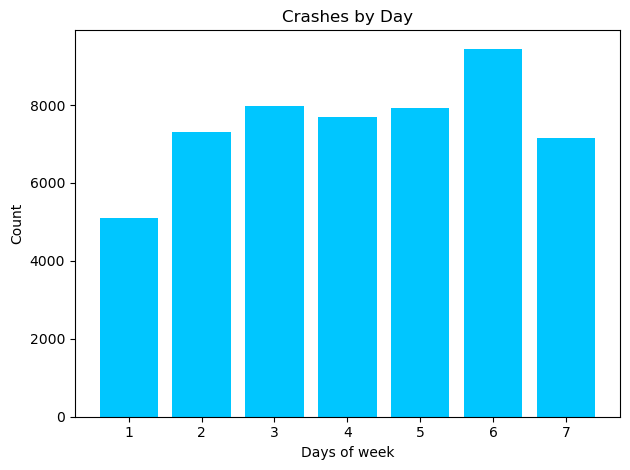

In [161]:
plt.bar(list(crashes.index), crashes.values, color="#00c6ff")
plt.xlabel("Days of week")
plt.ylabel("Count")
plt.title("Crashes by Day")
plt.tight_layout()
plt.show()

In [162]:
day_1_count = day_1.groupby("month").day.value_counts()
day_1_count.head()

month  day
1      1      474
2      1      403
3      1      330
4      1      467
5      1      371
Name: count, dtype: int64

In [163]:
day_1_count_list = day_1_count.values.tolist()
day_1_count_list

[474, 403, 330, 467, 371, 341, 333, 401, 551, 519, 463, 443]

In [164]:
# Locate values
day_1 = df.loc[(df["day"] == 1)]
day_2 = df.loc[(df["day"] == 2)]
day_3 = df.loc[(df["day"] == 3)]
day_4 = df.loc[(df["day"] == 4)]
day_5 = df.loc[(df["day"] == 5)]
day_6 = df.loc[(df["day"] == 6)]
day_7 = df.loc[(df["day"] == 7)]

# Group by `month` and take the count of the `day` column for each.
day_1_count = day_1.groupby("month").day.value_counts()
day_2_count = day_2.groupby("month").day.value_counts()
day_3_count = day_3.groupby("month").day.value_counts()
day_4_count = day_4.groupby("month").day.value_counts()
day_5_count = day_5.groupby("month").day.value_counts()
day_6_count = day_6.groupby("month").day.value_counts()
day_7_count = day_7.groupby("month").day.value_counts()


#Create list of values

day_1_count_list = day_1_count.values.tolist()
day_2_count_list = day_2_count.values.tolist()
day_3_count_list = day_3_count.values.tolist()
day_4_count_list = day_4_count.values.tolist()
day_5_count_list = day_5_count.values.tolist()
day_6_count_list = day_6_count.values.tolist()
day_7_count_list = day_7_count.values.tolist()

days_count = {
                    "Day 1": day_1_count_list,
                    "Day 2": day_2_count_list,
                    "Day 3": day_3_count_list,
                    "Day 4": day_4_count_list,
                    "Day 5": day_5_count_list,
                    "Day 6": day_6_count_list,
                    "Day 7": day_7_count_list
                   }
# Combine each of the values above into single DataFrame 
day_count_by_month = pd.DataFrame(days_count)

# Minor data wrangling
day_count_by_month.index.name = "Month"

# Display the DataFrame
day_count_by_month


,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Month,,,,,,,
0,474,574,665,676,798,765,586
1,403,581,653,618,670,829,622
2,330,550,588,545,592,672,458
3,467,565,661,601,696,806,645
4,371,505,581,618,672,791,583
5,341,557,526,569,538,620,492
6,333,541,585,558,582,630,472
7,401,675,640,690,635,785,557
8,551,684,761,686,671,871,676


In [165]:
#Q2: What type of injuries are most likely to occur? Are more severe injuries likely to occur in one car accidents or multi-car accidents?
injury = df.injury_type.value_counts()

#Create DataFrame/Leaderboard
pd.DataFrame(injury)

,count
injury_type,
No injury/unknown,40357
Non-incapacitating,11034
Incapacitating,1076
Fatal,115


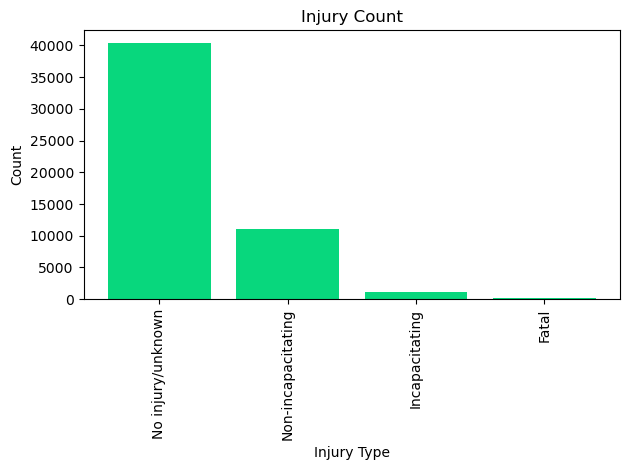

In [170]:
plt.bar(list(injury.index), injury.values, color="#08D77D")
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.title("Injury Count")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

In [167]:
#part 2 what types of injuries occur by collision type
collision_injury = df.groupby("collision_type").injury_type.value_counts()

pd.DataFrame(collision_injury)

count
collision_type   injury_type              
1-Car            No injury/unknown    7676
                 Non-incapacitating   2104
                 Incapacitating        203
                 Fatal                  49
2-Car            No injury/unknown   29797
                 Non-incapacitating   6272
                 Incapacitating        442
                 Fatal                  31
3+ Cars          No injury/unknown    1818
                 Non-incapacitating   1169
                 Incapacitating        114
                 Fatal                   5
Bus              No injury/unknown     749
                 Non-incapacitating     82
                 Incapacitating          9
                 Fatal                   1
Cyclist          Non-incapacitating    354
                 No injury/unknown      59
                 Incapacitating         50
Moped/Motorcycle Non-incapacitating    613
                 No injury/unknown     211
                 Incapacitating        154
                 Fatal                  21
Pedestrian       Non-incapacitating    440
                 Incapacitating        104
                 No injury/unknown      47
                 Fatal                   8

In [168]:
counts = collision_injury.values
counts

array([ 7676,  2104,   203,    49, 29797,  6272,   442,    31,  1818,
        1169,   114,     5,   749,    82,     9,     1,   354,    59,
          50,   613,   211,   154,    21,   440,   104,    47,     8],
      dtype=int64)

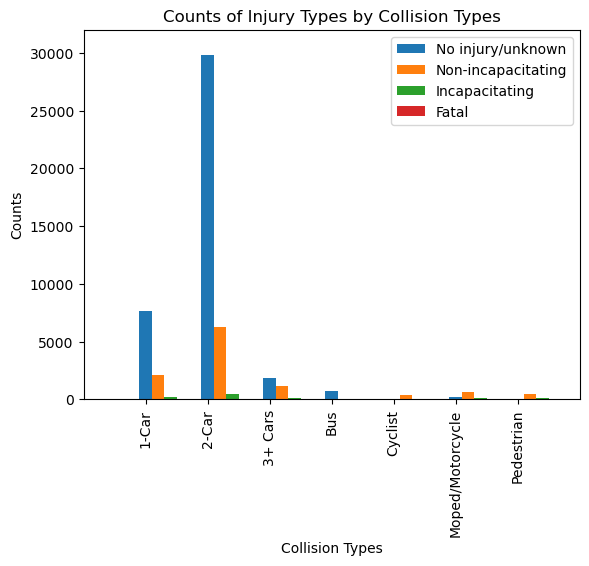

In [169]:
#Create a group bar chart

#Used xpert for code

# Data for the grouped bar chart
collision_types = ['1-Car', '2-Car', '3+ Cars', 'Bus', 'Cyclist', 'Moped/Motorcycle', 'Pedestrian']
injury_types = ['No injury/unknown', 'Non-incapacitating', 'Incapacitating', 'Fatal']
#Try to index values

counts = [[7676, 2104, 203, 49],
          [29797, 6272, 442, 31],
          [1818, 1169, 114, 5],
          [749, 82, 9, 1],
          [59, 354, 50, 0],
          [211, 613, 154, 21],
          [47, 440, 104, 8]]


# Plotting the grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.2
x = range(len(collision_types))

for i in range(len(injury_types)):
    plt.bar([pos + i*bar_width for pos in x], [counts[j][i] for j in range(len(collision_types))], bar_width, label=injury_types[i])

plt.xlabel('Collision Types')
plt.ylabel('Counts')
plt.title('Counts of Injury Types by Collision Types')
plt.xticks(x, collision_types, rotation = "vertical")
plt.ylim(-1, 32000)
plt.xlim(-1, 7)
plt.legend()
plt.show()